# Introduction to sciket learn

this book demonstarates some of the most useful functions of the beautiful Sciket learn library.
What we are going to cover:
0. An end-to-end Sciket-learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problems 
3. Fit the model/algorithms and use it to make predicitons on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together

# **0. An end-to-end Sciket-learn workflow**

In [3]:
# import the data
!wget https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
# 1. Get the data ready

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
heart_disease = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
# Create X ( features matrix)
X = heart_disease.drop("target", axis=1)

# Create y (labels)
y = heart_disease["target"]

In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
#2. Chosse the right model and hyperparameter
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

# we'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [8]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf.fit(X_train, y_train);

In [9]:
# make a prediction
import numpy as np
y_preds = clf.predict(X_test)
y_preds

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [10]:
# 4. Evaluate the model on the training data and test data
clf.score(X_train, y_train)

1.0

In [11]:
clf.score(X_test, y_test)

0.7868852459016393

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.83      0.69      0.75        29
           1       0.76      0.88      0.81        32

    accuracy                           0.79        61
   macro avg       0.80      0.78      0.78        61
weighted avg       0.79      0.79      0.78        61



In [13]:
confusion_matrix(y_test, y_preds)

array([[20,  9],
       [ 4, 28]], dtype=int64)

In [14]:
accuracy_score(y_test, y_preds)

0.7868852459016393

In [15]:
# 5. Imporve a model
# Try different amount of n_estimators
np.random.seed(42)
for i in range(10, 100, 10):
  print(f"Trying model with {i} estimators....")
  clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
  print(f"Model accuracy on test set: {clf.score(X_test, y_test) * 100}")
  print("")

Trying model with 10 estimators....
Model accuracy on test set: 81.9672131147541

Trying model with 20 estimators....
Model accuracy on test set: 80.32786885245902

Trying model with 30 estimators....
Model accuracy on test set: 75.40983606557377

Trying model with 40 estimators....
Model accuracy on test set: 78.68852459016394

Trying model with 50 estimators....
Model accuracy on test set: 77.04918032786885

Trying model with 60 estimators....
Model accuracy on test set: 78.68852459016394

Trying model with 70 estimators....
Model accuracy on test set: 80.32786885245902

Trying model with 80 estimators....
Model accuracy on test set: 80.32786885245902

Trying model with 90 estimators....
Model accuracy on test set: 78.68852459016394



In [16]:
# 6. Save a model and load it
import pickle 

pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

In [17]:
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
loaded_model.score(X_test, y_test)

0.7868852459016393

## **1. Gettting the data ready to be used with machine learning**

Three main things we hve to do:
  1. Splie the data into features and labels (usually 'x' & 'y')
  2. Filling (also called imputing) or disregarding messing values 
  3. Converting non-numierical values to numerical values (also called feature encoding)

In [18]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

In [20]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [21]:
!pip install tabnine

ERROR: Could not find a version that satisfies the requirement tabnine (from versions: none)
ERROR: No matching distribution found for tabnine
You should consider upgrading via the 'c:\users\apoff\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [22]:
# split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [24]:
len(heart_disease)

303

# **1.1 Make sure it's all numerical**

In [25]:
# import the data
!wget https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended-missing-data.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [26]:

car_sales = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended-missing-data.csv")
car_sales


,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [27]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [28]:
len(car_sales)

1000

In [29]:
car_sales.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
# Split into X/y
X = car_sales.drop("Price", axis=1)

y = car_sales["Price"]

# Split into training and test
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.3)

In [32]:
X

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0
...,...,...,...,...
995,Toyota,Black,35820.0,4.0
996,NaN,White,155144.0,3.0
997,Nissan,Blue,66604.0,4.0
998,Honda,White,215883.0,4.0


In [34]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier()
model.fit(X_train, y_train)
model.score(X_train, y_train)

ValueError: could not convert string to float: 'Toyota'

In [38]:
#Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In [39]:
transformed_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In [40]:
pd.DataFrame(transformed_X)

,0
0,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
1,"(0, 0)\t1.0\n (0, 6)\t1.0\n (0, 13)\t1.0\n..."
2,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
3,"(0, 3)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
4,"(0, 2)\t1.0\n (0, 6)\t1.0\n (0, 11)\t1.0\n..."
...,...
995,"(0, 3)\t1.0\n (0, 5)\t1.0\n (0, 12)\t1.0\n..."
996,"(0, 4)\t1.0\n (0, 9)\t1.0\n (0, 11)\t1.0\n..."
997,"(0, 2)\t1.0\n (0, 6)\t1.0\n (0, 12)\t1.0\n..."
998,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."


In [41]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4.0,0,1,0,0,0,0,0,0,1
1,5.0,1,0,0,0,0,1,0,0,0
2,4.0,0,1,0,0,0,0,0,0,1
3,4.0,0,0,0,1,0,0,0,0,1
4,3.0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4.0,0,0,0,1,1,0,0,0,0
996,3.0,0,0,0,0,0,0,0,0,1
997,4.0,0,0,1,0,0,1,0,0,0
998,4.0,0,1,0,0,0,0,0,0,1


In [42]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(dummies, 
                                                    y,
                                                    test_size = 0.2)

### **1.2 What if there were missing values?**
  1. Fill them with some value (also known as imputation).
  2. Remove the samples with missing data altogether.

In [43]:
# Downlaod the data
!wget https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended-missing-data.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [44]:
# Import car sales missing data
car_sales_missing = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [45]:
car_sales_missing.isna()

,Make,Colour,Odometer (KM),Doors,Price
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
995,False,False,False,False,False
996,True,False,False,False,False
997,False,False,False,False,False
998,False,False,False,False,False


In [46]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [47]:
# Create X and y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [48]:
# Let's try and convert our data to numbers
dummies = pd.get_dummies(car_sales_missing[["Make", "Colour", "Doors"]])

In [49]:
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4.0,0,1,0,0,0,0,0,0,1
1,5.0,1,0,0,0,0,1,0,0,0
2,4.0,0,1,0,0,0,0,0,0,1
3,4.0,0,0,0,1,0,0,0,0,1
4,3.0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4.0,0,0,0,1,1,0,0,0,0
996,3.0,0,0,0,0,0,0,0,0,1
997,4.0,0,0,1,0,0,1,0,0,0
998,4.0,0,1,0,0,0,0,0,0,1


**option 1: Fill missing data pandas**

In [50]:
from pandas.core.arrays.numeric import T
# Fill the "Make" column
car_sales_missing["Make"].fillna("missing", inplace=True)

# Fill the "Colour" column
car_sales_missing["Colour"].fillna("missing", inplace=True)

# Fill the Colour column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

# Fill the "Doors" column
car_sales_missing["Doors"].fillna(4, inplace=True)

In [51]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [52]:
# Remove rows with missing Price value
car_sales_missing.dropna(inplace=True)

In [53]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [54]:
len(car_sales_missing)

950

In [55]:
X = car_sales_missing.drop("Price", axis = 1)
y = car_sales_missing["Price"]

In [56]:
# Let's try and convert our data to numbers
# Turn the categories into numbers
# from sklearn.preprocessing  import OneHotEncoder
# from sklearn.compose import ColumnTransformer

# categorical_features = ["Make", "Colour", "Doors"]
# one_hot = OneHotEncoder()
# transformer_


In [57]:
car_sales_missing = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [58]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [59]:
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

**imputer just fill the missing data, if strategy is constant then we have to use the fill values*.*\

**ColumnImputer is the function 

In [60]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical wth mean 
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")
# 
# Define columns
cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)\

imputer = ColumnTransformer([
  ("cat_imputer", cat_imputer, cat_features),
  ("door_imputer", door_imputer, door_features),
  ("num_imputer", num_imputer, num_features)
])

# Transfrom the data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [61]:
car_sales_filled = pd.DataFrame(filled_X,
                                columns = ["Make", "Colour", "Doors", "Odometer (KM)"])

In [62]:
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [63]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [64]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [65]:
# Now we've got our data as numbers and filled (no missing value)
# Let's fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                    y,
                                                    test_size=0.2)
model =RandomForestRegressor(n_estimators=100)
model.fit(X_train,y_train)
model.score(X_test, y_test)



0.22011714008302485

In [66]:
len(car_sales_filled), len(car_sales)

(950, 1000)

##2. Choosing the right estimator/algorithm for your problem

Some things to note:
* sklearn  refers to machine leanring models, algorithms as estemaotrs.
* Classification problem - predicting a category (heart disease or not)
  * Sometimes you'll see `clf` (short for classifier) used as a classification estimator
* Regression problem - predicting a number (selling price of a car)

If you're working on a machine learning problem and looking to use Sklearn and not sure what moel you should use, refer to the sklearn machine learning map:




In [67]:
# Get California Housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [68]:
housing['feature_names']

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [69]:
housing_df = pd.DataFrame(housing["data"], columns = housing['feature_names'])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [70]:
housing_df["target"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [71]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [72]:
# Import algorithm
# Setup random seed

from sklearn.linear_model import Ridge

np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model (on the training set)
model = Ridge()
model.fit(X_train, y_train)


# Check the score of the model (on the test set)
model.score(X_test, y_test)

0.5758549611440127

What if `Ridge` didn't wor or the score didn't fit our needs?
Well, we could always try a different  model...

How about we try an ensemble model (an ensemble is combination of similar `random RandomForestClassifier`)

In [73]:
# Import the RandomForestRegressor model class from the enseble moudle
from sklearn.ensemble import RandomForestRegressor

# setup radnom seed
np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into the train and test_sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create random forest model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# check the score of the model (on the test data)
model.score(X_test, y_test)

0.8065734772187598

## **2.2 Choosing an estimator for a classification problem**


In [74]:
heart_disease = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


consulting the map and it says to try to `LinearSVC`

In [75]:
# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

#setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate LinearSVC
clf = LinearSVC(max_iter=10000)
clf.fit(X_train, y_train)

# Evaluate the LinearSVC
clf.score(X_test, y_test)

0.8688524590163934

In [76]:
heart_disease["target"].value_counts

<bound method IndexOpsMixin.value_counts of 0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64>

In [77]:
from sklearn.ensemble import RandomForestClassifier

# setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train,  y_test = train_test_split(X,y, test_size=0.2)

# Instantiate LinearSVC
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# Evaluate the Random Forest Classifier
clf.score(X_test, y_test)

0.8524590163934426

Tidbit:
  1. If you have structured data, used ensemble methods
  2. If you have unstructured data, use deep learning or transfer learning 

##3.2 Make predictioins using a machine learning model

2 ways to make predictions:
1. `predict()`
2.  `predict_proba()`

In [78]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [79]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [80]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [81]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [82]:
clf.score(X_test, y_test)

0.8524590163934426

In [83]:
# Compare the prdiction to truth labels to Evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds==y_test)

0.8524590163934426

In [84]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

In [85]:
# Make predictions with `predict_proba()`
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [86]:
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [87]:
heart_disease["target"].value_counts

<bound method IndexOpsMixin.value_counts of 0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64>

In [88]:
X_test[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


`predict` can also be used for regression models

In [89]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model instance
model = RandomForestRegressor()

# Fit the model 
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)



In [90]:
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [91]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [92]:
len(y_preds)

4128

In [93]:
# compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.32659871732073664

In [94]:
housing_df["target"]

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

## 4. Evaluating a machine learning model

Three ways to evaluate Sciket-learn models/estimators
1. `Estimator's` built-in `score()` methond
2. The `scoring` parameter 
    3. Problem-specific metric functions

you can read more about these here: https://scikit-learn.org/stable/modules/model_evaluation.html

### 4.1  Evaluating a model with the `score` method

In [95]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Instantiate Random  Forest Classifier
clf = RandomForestClassifier(n_estimators=1000)

# Fit the model to the data
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [96]:
clf.score(X_test, y_test)

0.8688524590163934

In [97]:
clf.score(X_train, y_train)

1.0

Let us use the `score` methond in the regression problem

In [98]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df.target

# Split into the training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model instance
model = RandomForestRegressor(n_estimators=100)

# Fit the model
model.fit(X_train, y_train)

# Check the score of the model
model.score(X_test, y_test)

0.8065734772187598

In [99]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


### **4.2 Evaluating a model using `scoring` parameter**

In [100]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train, y_train)




RandomForestClassifier()

In [101]:
clf.score(X_test, y_test)

0.8524590163934426

In [102]:
cross_val_score(clf, X, y, cv = 5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation 
1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

In [103]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target",axis=1)
y = heart_disease.target

clf = RandomForestClassifier(n_estimators=100)
cross_val_score = cross_val_score(clf, X, y, cv=5)

In [104]:
import numpy as np
np.mean(cross_val_score)

0.8248087431693989

In [105]:
print(f"Heart Disease Classifier Accuracy: {np.mean(cross_val_score) * 100:.2f}%")

Heart Disease Classifier Accuracy: 82.48%


Let me try the `logisticRegression()`

In [106]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8852459016393442

In [107]:
from sklearn.model_selection import cross_val_score
cross_val_score = cross_val_score(model, X, y, cv=150)
cross_val_score

array([1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 0.5, 1. , 1. ,
       1. , 1. , 1. , 1. , 0.5, 0.5, 0. , 1. , 1. , 1. , 1. , 0.5, 1. ,
       1. , 0.5, 1. , 0.5, 1. , 1. , 0.5, 1. , 1. , 0.5, 0. , 0.5, 1. ,
       1. , 1. , 0.5, 1. , 0.5, 1. , 1. , 0.5, 0.5, 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 0.5, 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 0.5, 1. , 1. , 1. , 1. , 1. , 0.5, 1. , 0.5,
       1. , 1. , 0.5, 1. , 0.5, 1. , 1. , 1. , 0.5, 1. , 0.5, 1. , 1. ,
       1. , 1. , 1. , 1. , 0.5, 1. , 1. , 1. , 1. , 1. , 0.5, 1. , 1. ,
       1. , 0. , 0.5, 1. , 0.5, 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 0.5, 1. , 0.5, 1. , 1. , 0.5, 0. , 0.5, 1. , 1. , 0.5, 0.5,
       0.5, 1. , 1. , 0.5, 0.5, 0.5, 1. , 1. , 1. , 1. , 0.5, 1. , 1. ,
       0. , 1. , 1. , 0.5, 1. , 1. , 0.5])

In [108]:
np.mean(cross_val_score)

0.84

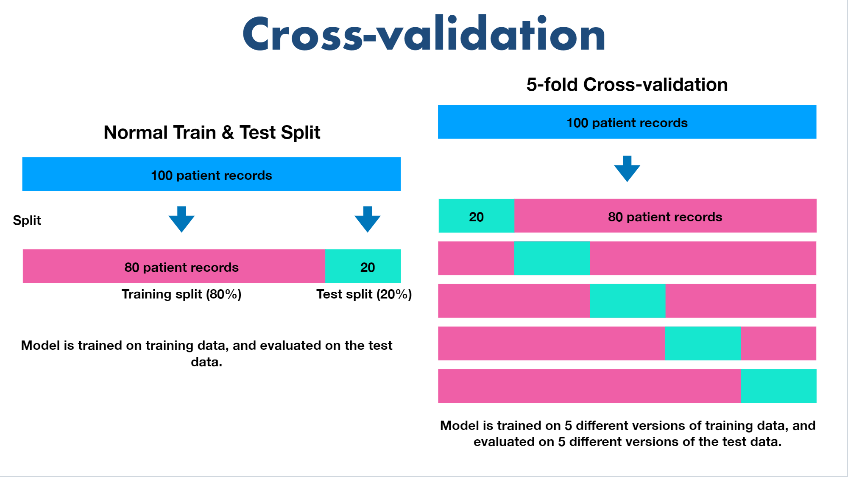

In [109]:
np.random.seed(42)

# Single training and test split score
clf.fit(X_train, y_train)
clf.score(X_test,y_test)


0.8360655737704918

In [110]:
# take a five fold validation score
from sklearn.model_selection import cross_val_score

#Single training and test split score 
clf_single_score = clf.score(X_test, y_test)

# Take the mean of 5-fold cross validation score 
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

# compare the two
clf_single_score, clf_cross_val_score

(0.8360655737704918, 0.8214754098360656)

In [111]:
# Default scoring paerameter of classifier = mean accuracy
clf.score(X_test, y_test)

0.8360655737704918

In [112]:
# Scoring parameter set to None by default
cross_val_score(clf, X, y, cv=5, scoring=None)

array([0.83606557, 0.8852459 , 0.83606557, 0.8       , 0.78333333])

### 4.2.1 Classification model evaluation metrics
1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification matrix

Accuracy

In [113]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease.target

clf = RandomForestClassifier(n_estimators=100)
cross_val_score = cross_val_score(clf, X, y, cv=5)

In [114]:
np.mean(cross_val_score)

0.8248087431693989

In [115]:
print(f"Heart Disease Classifier cross-validated Accruacy: {np.mean(cross_val_score)*100:.2f}%")

Heart Disease Classifier cross-validated Accruacy: 82.48%


**Area under the receiver operating  characteristic curve(AUC/ROC)**
* Area under curve(AUC)
* ROC curve

ROC curve are a comparision of a model's ture positive (tpr) versus a model's false positive rate (fpr).

* True positive  = model predicts 1 when truth is 1
* False Positive =  model predicts 1 when truth is 0
* Ture negative  = model predicts 0 when truth is 0
* False negative  = model predicts 0 when truth is 1


In [116]:
# Create X_test... etc
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [117]:
from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(X_train, y_train)

# Make prediction with probabilities
y_probs = clf.predict_proba(X_test)

# Keep the positive classes
y_probs[:10], len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [118]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [119]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

In [120]:
tpr

array([0.     , 0.     , 0.125  , 0.1875 , 0.25   , 0.3125 , 0.375  ,
       0.375  , 0.5    , 0.53125, 0.5625 , 0.59375, 0.59375, 0.625  ,
       0.71875, 0.71875, 0.78125, 0.8125 , 0.90625, 0.90625, 0.9375 ,
       0.9375 , 0.96875, 0.96875, 1.     , 1.     ])

In [121]:
thresholds

array([2.  , 1.  , 0.98, 0.95, 0.92, 0.88, 0.87, 0.86, 0.85, 0.83, 0.81,
       0.8 , 0.77, 0.76, 0.71, 0.66, 0.6 , 0.57, 0.49, 0.4 , 0.38, 0.31,
       0.28, 0.23, 0.2 , 0.  ])

In [122]:
# Create a function for plotting ROC curve
import matplotlib.pyplot as plt
def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr) and true p
    positive rate (tpr) of a model
    """
    # PLot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predictive power (headline)
    # plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")
    
    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic ROC Curve");
    plt.legend();
    plt.show();

    
    

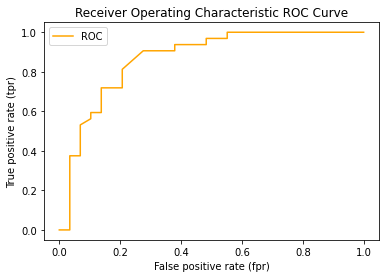

In [123]:
plot_roc_curve(fpr, tpr)

In [124]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

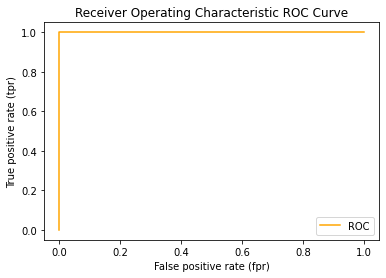

In [125]:
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [126]:
# Perfect AUC score
roc_auc_score(y_test, y_test)

1.0

**Confusion Matrix**

A confusion matrix is a quick way to compare the labels it was supposed to predict. 
In essence, giving you an idea of where the model is getting confused

In [127]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [128]:
# Visualize confusion matrixx with pd.crosstab()
pd.crosstab(y_test, 
           y_preds, 
           rownames=["Actual Labels"],
           colnames =["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


In [129]:
22 + 7 + 24

53

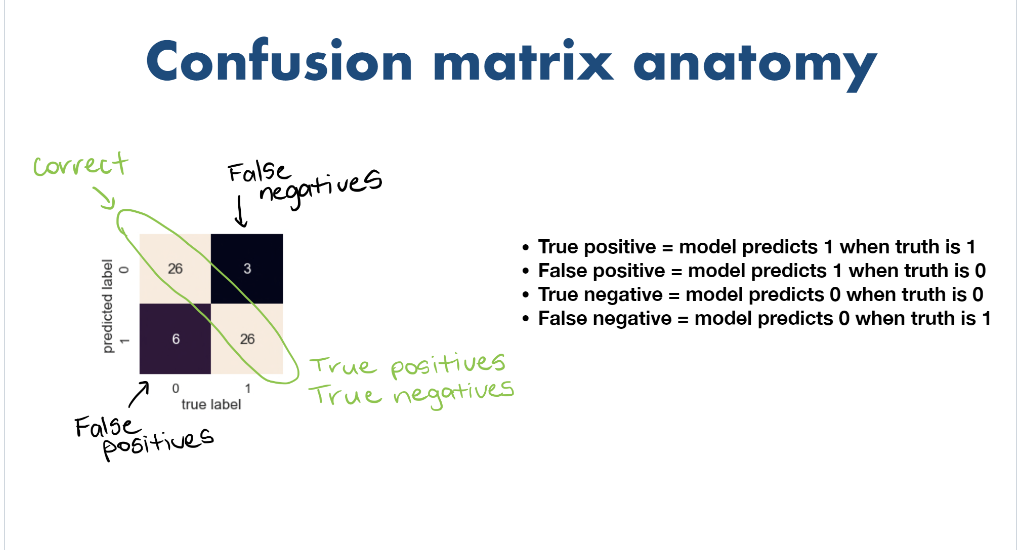

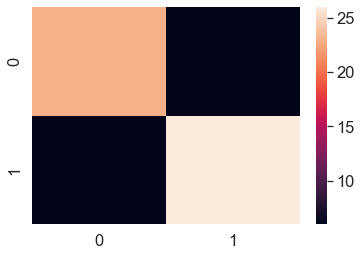

In [130]:
# Make our confussion matrix 
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat);

In [131]:
!pip install pandas

You should consider upgrading via the 'c:\users\apoff\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


**Confusion Matrix** 

The next way to evaluate a classification model is by using a confusion matrix

A confusion matrix is a quick way to compare the labels a model predicts and the acutal labels it was supposed to predict

In essence, this gives you an idea of  where the model is getting confused.

In [132]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [133]:
import pandas as pd
pd.crosstab(y_test, y_preds,
           rownames=["Acutal Label"],
           colnames=["Predicted Label"])

Predicted Label,0,1
Acutal Label,,
0,23,6
1,6,26


The first version of confusion matrix you need not to pass the y_preds, but in the second version of confusion matrix you need to pass the y_pred as well. you can read the documentation for more purposes

### Creating a confusiom matrix using sciket-Learn

To use the methods of creating a confusion matrix with Sciket Learn you will need sklearn version 1.0+


In [134]:
import sklearn
sklearn.__version__

'1.0.2'

we would be using the from `from_estimator` for the first type

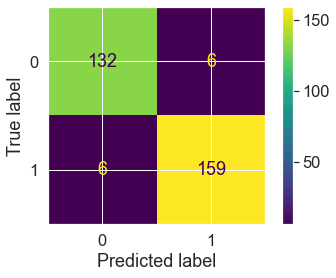

In [135]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y)

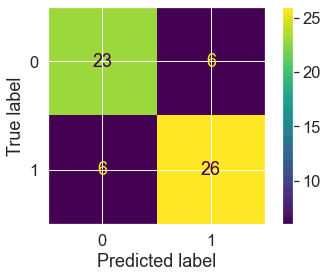

In [136]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test, 
                                       y_pred = y_preds)

In [137]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



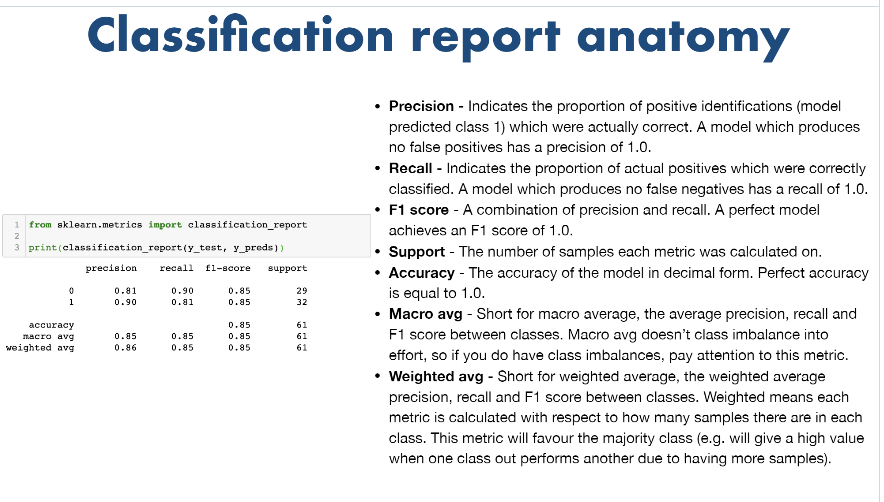

In [138]:
# Where precision and recall become valuable
import numpy as np
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000)

pd.DataFrame(classification_report(disease_true,
                                  disease_preds,
                                  output_dict=True))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


### 4.2.2 Regression Model  Evaluation Metrics

Model evaluation metrics documentation - https://towardsdatascience.com/what-are-the-best-metrics-to-evaluate-your-regression-model-418ca481755b

The ones we're going to cover to are:
1. R^2 (pronounced R-squared) or cofficient or determination
2. Mean absoulute error (MAE)
3. Mean square erro (MSE)

In [141]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

RandomForestRegressor()

In [142]:
model.score(X_test, y_test)

0.8058066189927485

In [143]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [144]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [145]:
y_test_mean[:10]

array([2.06696814, 2.06696814, 2.06696814, 2.06696814, 2.06696814,
       2.06696814, 2.06696814, 2.06696814, 2.06696814, 2.06696814])

In [147]:
r2_score(y_true=y_test,
         y_pred = y_test_mean)

0.0

In [148]:
r2_score(y_true=y_test,
         y_pred = y_test)

1.0

**Mean absolute error (MAE)**

MAE is the average of the absolute differences betweenn predictions and acutal values.
It gives you an idean of how wrong your models predictions are.

In [150]:
# MAE
from sklearn.metrics import mean_absolute_error

ypreds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

ValueError: Found input variables with inconsistent numbers of samples: [6192, 61]

In [ ]:
# Predicting heart disease using machine learning